In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

In [37]:
data = pd.read_csv('DJIA.csv')


In [38]:
data.shape

(2474, 2)

In [39]:
data.head()

,DATE,DJIA
0,2009-01-02,9034.69
1,2009-01-05,8952.89
2,2009-01-06,9015.10
3,2009-01-07,8769.70
4,2009-01-08,8742.46


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 2 columns):
DATE    2474 non-null object
DJIA    2474 non-null object
dtypes: object(2)
memory usage: 38.7+ KB


In [41]:
# See descriptive statistics

data.describe()

,DATE,DJIA
count,2474,2474
unique,2474,2378
top,2014-07-16,.
freq,1,86


In [42]:
data.columns

Index(['DATE', 'DJIA'], dtype='object')

In [50]:
data.head(20)

,DATE,DJIA
0,2009-01-02,9034.69
1,2009-01-05,8952.89
2,2009-01-06,9015.10
3,2009-01-07,8769.70
4,2009-01-08,8742.46
5,2009-01-09,8599.18
6,2009-01-12,8473.97
7,2009-01-13,8448.56
8,2009-01-14,8200.14
9,2009-01-15,8212.49


In [52]:
data['DJIA'] = pd.to_numeric(data.DJIA, errors = 'coerce')
data['DATE'] = pd.to_datetime(data['DATE'])
data.dropna(inplace=True)

In [53]:
data.describe()

,DJIA
count,2388.000000
mean,15350.665406
std,4418.987945
min,6547.050000
25%,11886.907500
50%,15477.465000
75%,17914.002500
max,26616.710000


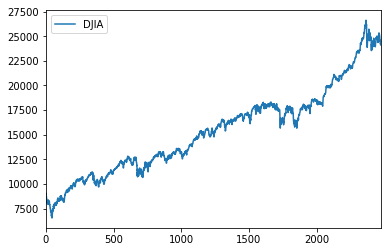

In [54]:
data.plot()
plt.show()

In [56]:
data.index = pd.to_datetime(data['DATE'])



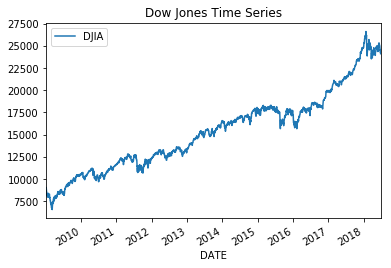

In [57]:
data.plot()
plt.title('Dow Jones Time Series')
plt.show()

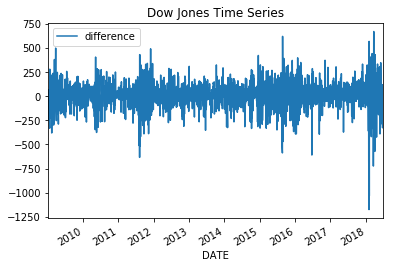

In [58]:
data['difference'] = data.DJIA - data.DJIA.shift()
data.plot(y='difference')
plt.title('Dow Jones Time Series')
plt.show()

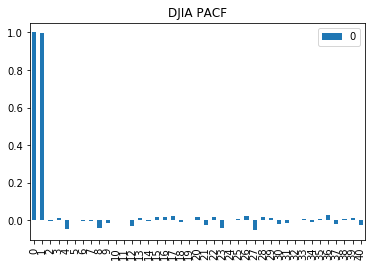

In [67]:
x_acf = pd.DataFrame(pacf(data['DJIA']))
x_acf.plot(kind='bar')
plt.title('DJIA PACF')
plt.show()

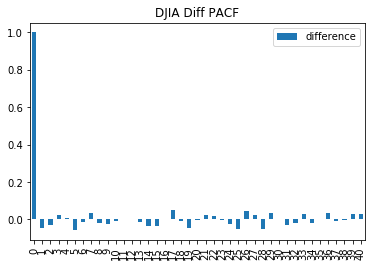

In [70]:
x_acf = pd.DataFrame(pacf(data['difference'][1:]))
x_acf.plot(kind='bar')
plt.title('DJIA Diff PACF')
plt.legend(['difference'])
plt.show()

In [86]:
def arima_model(order_parameters):
    model = ARIMA(data['DJIA'], order = order_parameters)
    model_fit = model.fit()
    print(model_fit.summary())
    print('Residuals Description')
    print(model_fit.resid.describe())

In [84]:
model = ARIMA(data['DJIA'], order = (1,0,0))
model_fit = model.fit()
#print(model_fit.summary())
#print('Residuals Description')
#print(model_fit.resid.describe())

In [85]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   DJIA   No. Observations:                 2388
Model:                     ARMA(1, 0)   Log Likelihood              -15124.047
Method:                       css-mle   S.D. of innovations            136.017
Date:                Thu, 28 Jun 2018   AIC                          30254.094
Time:                        17:05:38   BIC                          30271.429
Sample:                    01-02-2009   HQIC                         30260.402
                         - 06-27-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.535e+04   6205.560      2.474      0.013    3188.048    2.75e+04
ar.L1.DJIA     0.9998      0.000   3750.483      0.000       0.999       1.000
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

In [88]:
arima_model((1,0,0))

                              ARMA Model Results                              
Dep. Variable:                   DJIA   No. Observations:                 2388
Model:                     ARMA(1, 0)   Log Likelihood              -15124.047
Method:                       css-mle   S.D. of innovations            136.017
Date:                Thu, 28 Jun 2018   AIC                          30254.094
Time:                        17:06:09   BIC                          30271.429
Sample:                    01-02-2009   HQIC                         30260.402
                         - 06-27-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.535e+04   6205.560      2.474      0.013    3188.048    2.75e+04
ar.L1.DJIA     0.9998      0.000   3750.483      0.000       0.999       1.000
                                    Roots           

In [89]:
arima_model((1,1,0))

                             ARIMA Model Results                              
Dep. Variable:                 D.DJIA   No. Observations:                 2387
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -15108.804
Method:                       css-mle   S.D. of innovations            135.732
Date:                Thu, 28 Jun 2018   AIC                          30223.609
Time:                        17:06:18   BIC                          30240.942
Sample:                    01-05-2009   HQIC                         30229.916
                         - 06-27-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3244      2.657      2.380      0.017       1.116      11.532
ar.L1.D.DJIA    -0.0456      0.020     -2.227      0.026      -0.086      -0.005
                                    Roots   

In [90]:
arima_model((1,1,1))

                             ARIMA Model Results                              
Dep. Variable:                 D.DJIA   No. Observations:                 2387
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15107.791
Method:                       css-mle   S.D. of innovations            135.673
Date:                Thu, 28 Jun 2018   AIC                          30223.583
Time:                        17:06:34   BIC                          30246.694
Sample:                    01-05-2009   HQIC                         30231.993
                         - 06-27-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.6312      1.776      3.734      0.000       3.150      10.112
ar.L1.D.DJIA     0.9556      0.037     25.923      0.000       0.883       1.028
ma.L1.D.DJIA    -0.9719      0.030    -32.43

In [92]:
arima_model((0,0,1))

                              ARMA Model Results                              
Dep. Variable:                   DJIA   No. Observations:                 2388
Model:                     ARMA(0, 1)   Log Likelihood              -21824.649
Method:                       css-mle   S.D. of innovations           2252.151
Date:                Thu, 28 Jun 2018   AIC                          43655.299
Time:                        17:06:49   BIC                          43672.634
Sample:                    01-02-2009   HQIC                         43661.607
                         - 06-27-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.535e+04     91.412    167.936      0.000    1.52e+04    1.55e+04
ma.L1.DJIA     0.9839      0.003    364.832      0.000       0.979       0.989
                                    Roots           